In [41]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import SMOTE

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
#data = pd.read_csv('spam.csv')
data = pd.read_csv('drive//MyDrive//spam.csv')

In [44]:
data.shape

(5572, 2)

In [45]:
data.head(5)

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Label      5572 non-null   object
 1   EmailText  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [47]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
data.iloc[1].T

Label                                  ham
EmailText    Ok lar... Joking wif u oni...
Name: 1, dtype: object

In [48]:
data.head(3)

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [49]:
data.tail(3)

,Label,EmailText
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


**Split the dataset into independent & dependent**

In [50]:
def add_label(input):
  if input == 'ham':
    return 1
  else:
    return 0

data['Label'] = data['Label'].apply(add_label)

In [51]:
data['Label'].value_counts()

1    4825
0     747
Name: Label, dtype: int64

In [52]:
x = data['EmailText']
y = data['Label']

In [53]:
#y.value_counts().plot(kind="bar")
#y.value_counts()

In [54]:
vectorizer= CountVectorizer()
x = vectorizer.fit_transform(x)


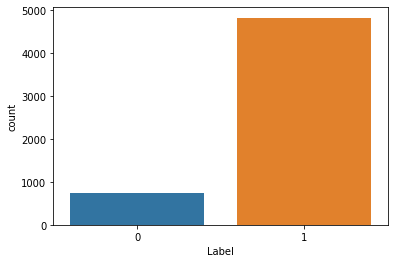

In [55]:
sns.countplot(x=data["Label"])

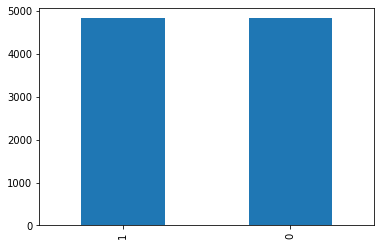

In [56]:
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)
y_smote.value_counts().plot(kind='bar')

In [57]:
#sns.countplot(x=data["Label"])

Split Data Set traning & testing


In [58]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, random_state=0, train_size = 0.8)

In [59]:
x_train.shape

(7720, 8679)

In [60]:
#x_train.head(3)

**CountVectorizer**

In [61]:
x_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [62]:
y_train.value_counts()

1    3889
0    3831
Name: Label, dtype: int64

In [63]:
# create a function to calculate the accuracy of the model
def accuracy(model):
    model.fit(x_train, y_train)
    y_pred = model.score(x_test, y_test)
    print(str(model) +' : '+ str(y_pred))

**Support Vector Machine algorithm use to train the model**

In [64]:
# use svm to train the model & get accuracy
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', random_state = 0)
accuracy(svm)

SVC(random_state=0) : 0.9523316062176166


**Create a dictionary called param_grid and fill out some parameters for kernels, C and gamma**

In [65]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}


**Create a GridSearchCV object and fit it to the training data**

In [66]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  10.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   9.9s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  10.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   9.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  10.3s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   3.3s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   3.3s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   3.5s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   3.3s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   3.3s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   3.7s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

**Accuracy Score**

In [67]:
# #accuracy_score
Y = grid.predict(x_test)
accuracy_score(y_test, Y)

0.960621761658031

**Confusion Matrix & Classification report**

In [68]:
# grid_predictions = grid.predict(x_test)
# print(confusion_matrix(y_test,grid_predictions))
# print(classification_report(y_test,grid_predictions))

In [69]:
print(x_train.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [70]:
print(x_train)

  (0, 1107)	1
  (0, 1201)	1
  (0, 1843)	1
  (0, 2415)	1
  (0, 3168)	1
  (0, 3558)	1
  (0, 3602)	1
  (0, 4215)	1
  (0, 4235)	1
  (0, 5235)	1
  (0, 5516)	1
  (0, 6858)	1
  (0, 7039)	1
  (0, 7737)	1
  (0, 8307)	1
  (0, 8308)	1
  (1, 38)	0
  (1, 322)	0
  (1, 400)	0
  (1, 792)	0
  (1, 890)	0
  (1, 3316)	0
  (1, 3405)	0
  (1, 3826)	0
  (1, 4737)	0
  :	:
  (7718, 2681)	1
  (7718, 3366)	3
  (7718, 5053)	1
  (7718, 5100)	1
  (7718, 5337)	1
  (7718, 5389)	1
  (7718, 5582)	1
  (7718, 5823)	1
  (7718, 6412)	1
  (7718, 7622)	1
  (7718, 7772)	1
  (7718, 8262)	1
  (7718, 8453)	1
  (7718, 8629)	1
  (7719, 964)	1
  (7719, 1130)	1
  (7719, 2442)	1
  (7719, 3802)	1
  (7719, 3962)	1
  (7719, 7341)	1
  (7719, 7511)	1
  (7719, 7575)	1
  (7719, 7772)	2
  (7719, 8491)	2
  (7719, 8629)	3


**Check mails are Spam or Ham**

In [72]:
#Ham Mail in dataset
#E1 = ["Tell where you reached"]

#Spam Mails in dataset
#E1 = ["Thanks for your subscription to Ringtone UK your mobile will be charged ÃƒÂ¥Ã‚Â£5/month Please confirm by replying YES or NO. If you reply NO you will not be charged"]
#E1=["Want 2 get laid tonight? Want real Dogging locations sent direct 2 ur mob? Join the UK's largest Dogging Network bt Txting GRAVEL to 69888! Nt. ec2a. 31p.msg@150p"]

#E1 = ["Hey, you have won a car !!!!. Conrgratzz"]
#E1 = ["Dear applicant, Your CV has been recieved. Best regards"]
#E1 = ["You have received $1000000 to your account"]
#E1 = ["Join with our whatsapp group"]
E1 = ["Kindly check the previous email. Kind Regards"]

input_data = vectorizer.transform(E1)

prediction = svm.predict(input_data)
print(prediction)

if(prediction[0]==1):
  print('Ham Mail')

else:
  print('Spam Mail')  

[0]
Spam Mail


1.   Hey, you have won a car !!!!. Conrgratzz  -  **spam mail**
2.   Dear applicant, Your CV has been recieved. Best regards  -  **ham mail**
3.   You have received $1000000 to your account  -  **spam mail**
4.   Join with our whatsapp group -  **spam mail**
5.   Kindly check the previous email. Kind Regards  -  **spam mail**

